In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, spacy
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics, ensemble
from scipy import stats
sns.set() # use seaborn plotting style

### Inspect Data

In [2]:
# Load the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('SImplyHired_cleaned_data_new_3_20.csv')
df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"['Full-time', 'Contract']",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,NaN,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[''],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,['Freelance'],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,NaN,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"['Full-time', 'Contract']",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,['Full-time'],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
# number of unique levels
df['level'].value_counts()

,count
level,
Senior level,434
Mid-level,233
Entry level,22


In [4]:
# inspect description example
df['full description'][0]

'Job SummaryWe are seeking a skilled Data Scientist with expertise in simulation models within the Retail sector. In this role, you will collaborate with cross-functional teams to develop and implement advanced simulation models, conduct in-depth \'what-if\' analyses, and support strategic decision-making through simulation, optimization, and operations research."Key Responsibilities · Build scalable simulation frameworks in Python (e.g., using SimPy or other simulation libraries), with openness to exploring other platforms or tools.· Collaborate with stakeholders to define key performance indicators (KPIs), data requirements, and realistic assumptions in simulation modeling.· Apply advanced optimization methods (linear programming, mixed-integer programming, heuristic algorithms, etc.) to support supply chain decision-making.· Work closely with cross-functional teams to identify areas of opportunity for optimization in transportation, inventory, and warehouse operations.Qualifications

### Preprocess Data and EDA

In [5]:
# Splitting the Data
X = df['full description']
y = df['level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

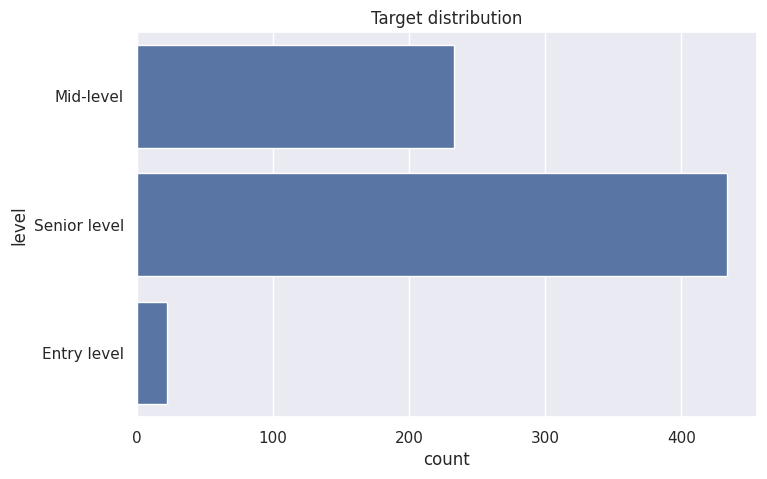

In [6]:
# plot the target distribution
plt.figure(figsize=(8,5))
sns.countplot(df['level'])
plt.title('Target distribution')
plt.show()

In [7]:
# first convert Text to Numeric Features
vectorizer = CountVectorizer()
X_train_CV = vectorizer.fit_transform(X_train)
X_test_CV = vectorizer.transform(X_test)

In [8]:
# over-sampling SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_CV_SMOTE, y_CV_SMOTE = smote.fit_resample(X_train_CV, y_train)

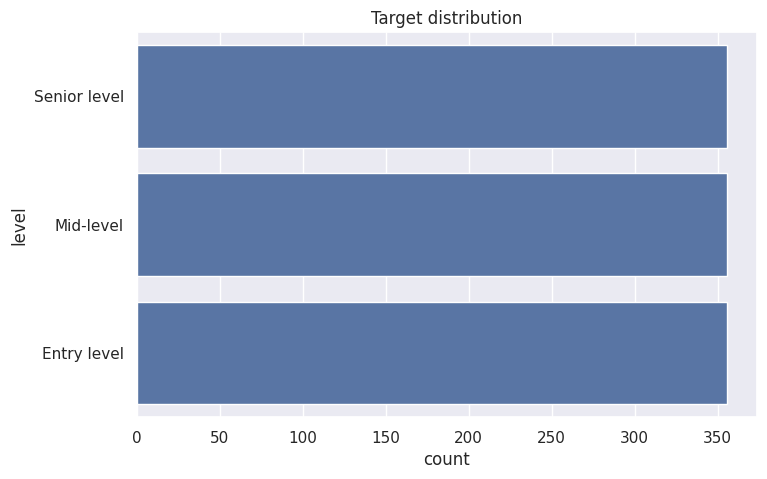

In [9]:
# plot the target distribution
plt.figure(figsize=(8,5))
sns.countplot(y_CV_SMOTE)
plt.title('Target distribution')
plt.show()

### Implement Model

#### CountVectorizer

In [10]:
# training the Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_CV_SMOTE, y_CV_SMOTE)
# make predictions
y_pred = model.predict(X_test_CV)

Accuracy: 65.94202898550725%


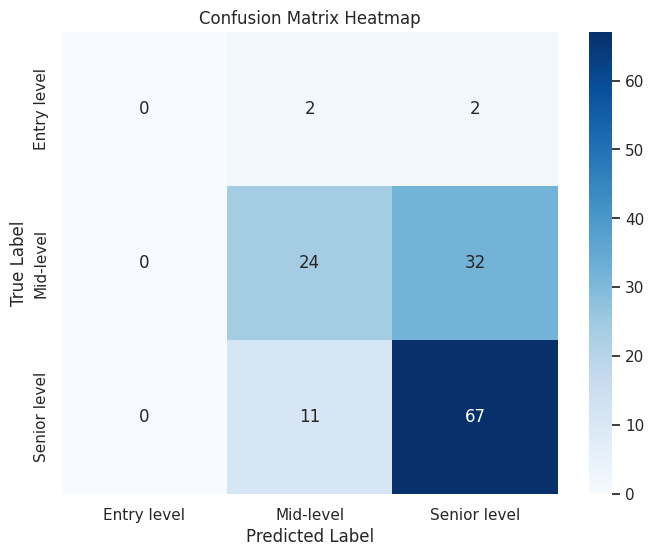

In [11]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy *100}%')

class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

 Entry level       0.00      0.00      0.00         4
   Mid-level       0.65      0.43      0.52        56
Senior level       0.66      0.86      0.75        78

    accuracy                           0.66       138
   macro avg       0.44      0.43      0.42       138
weighted avg       0.64      0.66      0.63       138



#### TfidfVectorizer

In [13]:
# Text Preprocessing: Converting Text to Numeric Features
vectorizer = TfidfVectorizer()
X_train_Tff = vectorizer.fit_transform(X_train)
X_test_Tff = vectorizer.transform(X_test)

In [14]:
# over-sampling SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_Tff_SMOTE, y_Tff_SMOTE = smote.fit_resample(X_train_Tff, y_train)

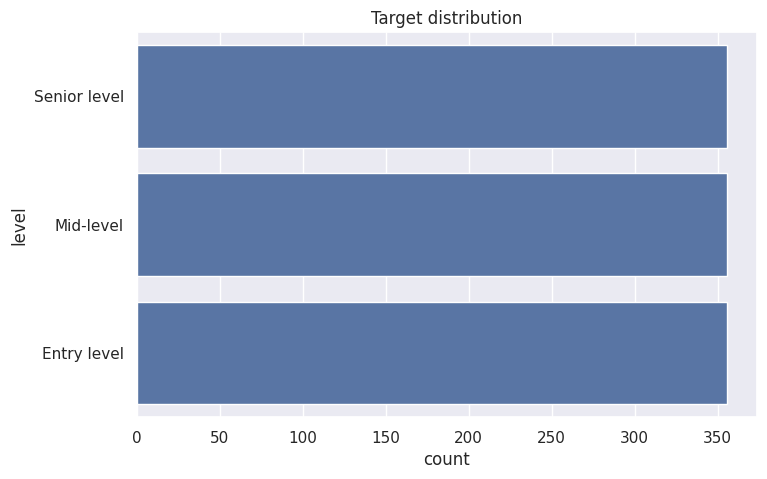

In [15]:
# plot the target distribution
plt.figure(figsize=(8,5))
sns.countplot(y_Tff_SMOTE)
plt.title('Target distribution')
plt.show()

In [16]:
# training the Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_Tff_SMOTE, y_Tff_SMOTE)
# make predictions
y_pred2 = model.predict(X_test_Tff)

Accuracy: 61.59420289855072%


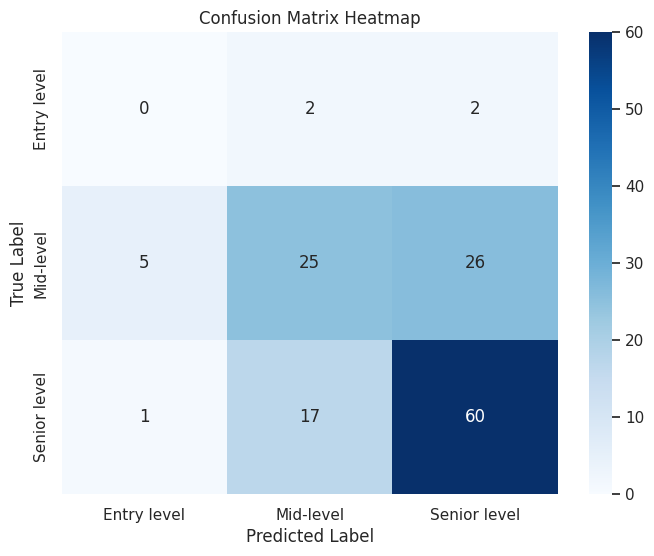

In [17]:
# evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

print(f'Accuracy: {accuracy2 *100}%')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [18]:
print(classification_report(y_test, y_pred2, target_names=class_labels))

              precision    recall  f1-score   support

 Entry level       0.00      0.00      0.00         4
   Mid-level       0.57      0.45      0.50        56
Senior level       0.68      0.77      0.72        78

    accuracy                           0.62       138
   macro avg       0.42      0.41      0.41       138
weighted avg       0.62      0.62      0.61       138



### Improve model

In [19]:
# Text Preprocessing: add lemmatization and stop-word removal

# Load full english language model
nlp = spacy.load('en_core_web_sm')

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ['ner', 'parser']

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop and t.is_alpha]

In [25]:
# Define vectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X_train_improved = vectorizer.fit_transform(X_train)
X_test_improved = vectorizer.transform(X_test)

In [26]:
# tune additive smoothing for numerical stability using 'Alpha'
grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

# define model
clf = MultinomialNB()

# define grid search
model = GridSearchCV(clf, param_grid=grid, scoring='f1_macro', n_jobs=-1, cv=5, verbose=1)

# train model using grid search
model.fit(X_train_improved, y_train)

# print best value of alpha
print('Best parameters:', model.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'alpha': 0.05}


In [27]:
# evaluate the model with alpha = 0.05
y_pred3 = model.predict(X_test_improved)
accuracy3 = accuracy_score(y_test, y_pred3)

print('Test set F1-score:', f1_score(y_test, y_pred3, average='macro'))
print(f'Accuracy: {accuracy3 *100}%')

Test set F1-score: 0.49231466539158847
Accuracy: 63.04347826086957%


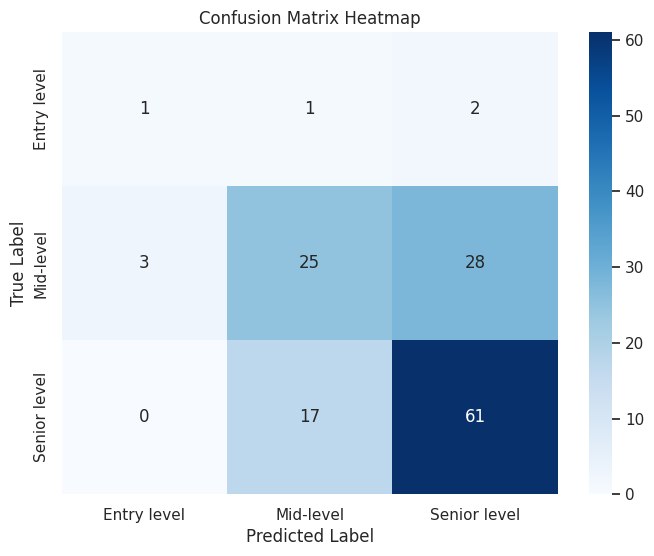

In [28]:
conf_matrix3 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
print(classification_report(y_test, y_pred3, target_names=class_labels))

              precision    recall  f1-score   support

 Entry level       0.25      0.25      0.25         4
   Mid-level       0.58      0.45      0.51        56
Senior level       0.67      0.78      0.72        78

    accuracy                           0.63       138
   macro avg       0.50      0.49      0.49       138
weighted avg       0.62      0.63      0.62       138

